In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Bosten House Pricing Dataset

In [26]:
data = pd.read_csv('../data/housingData.csv')


In [27]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [28]:
## try tp predict the price of the house
# MEDV is the target variable
# all others are predictors

## Analysis

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [30]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [31]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

## EDA

In [32]:
cor = data.corr()

<Axes: >

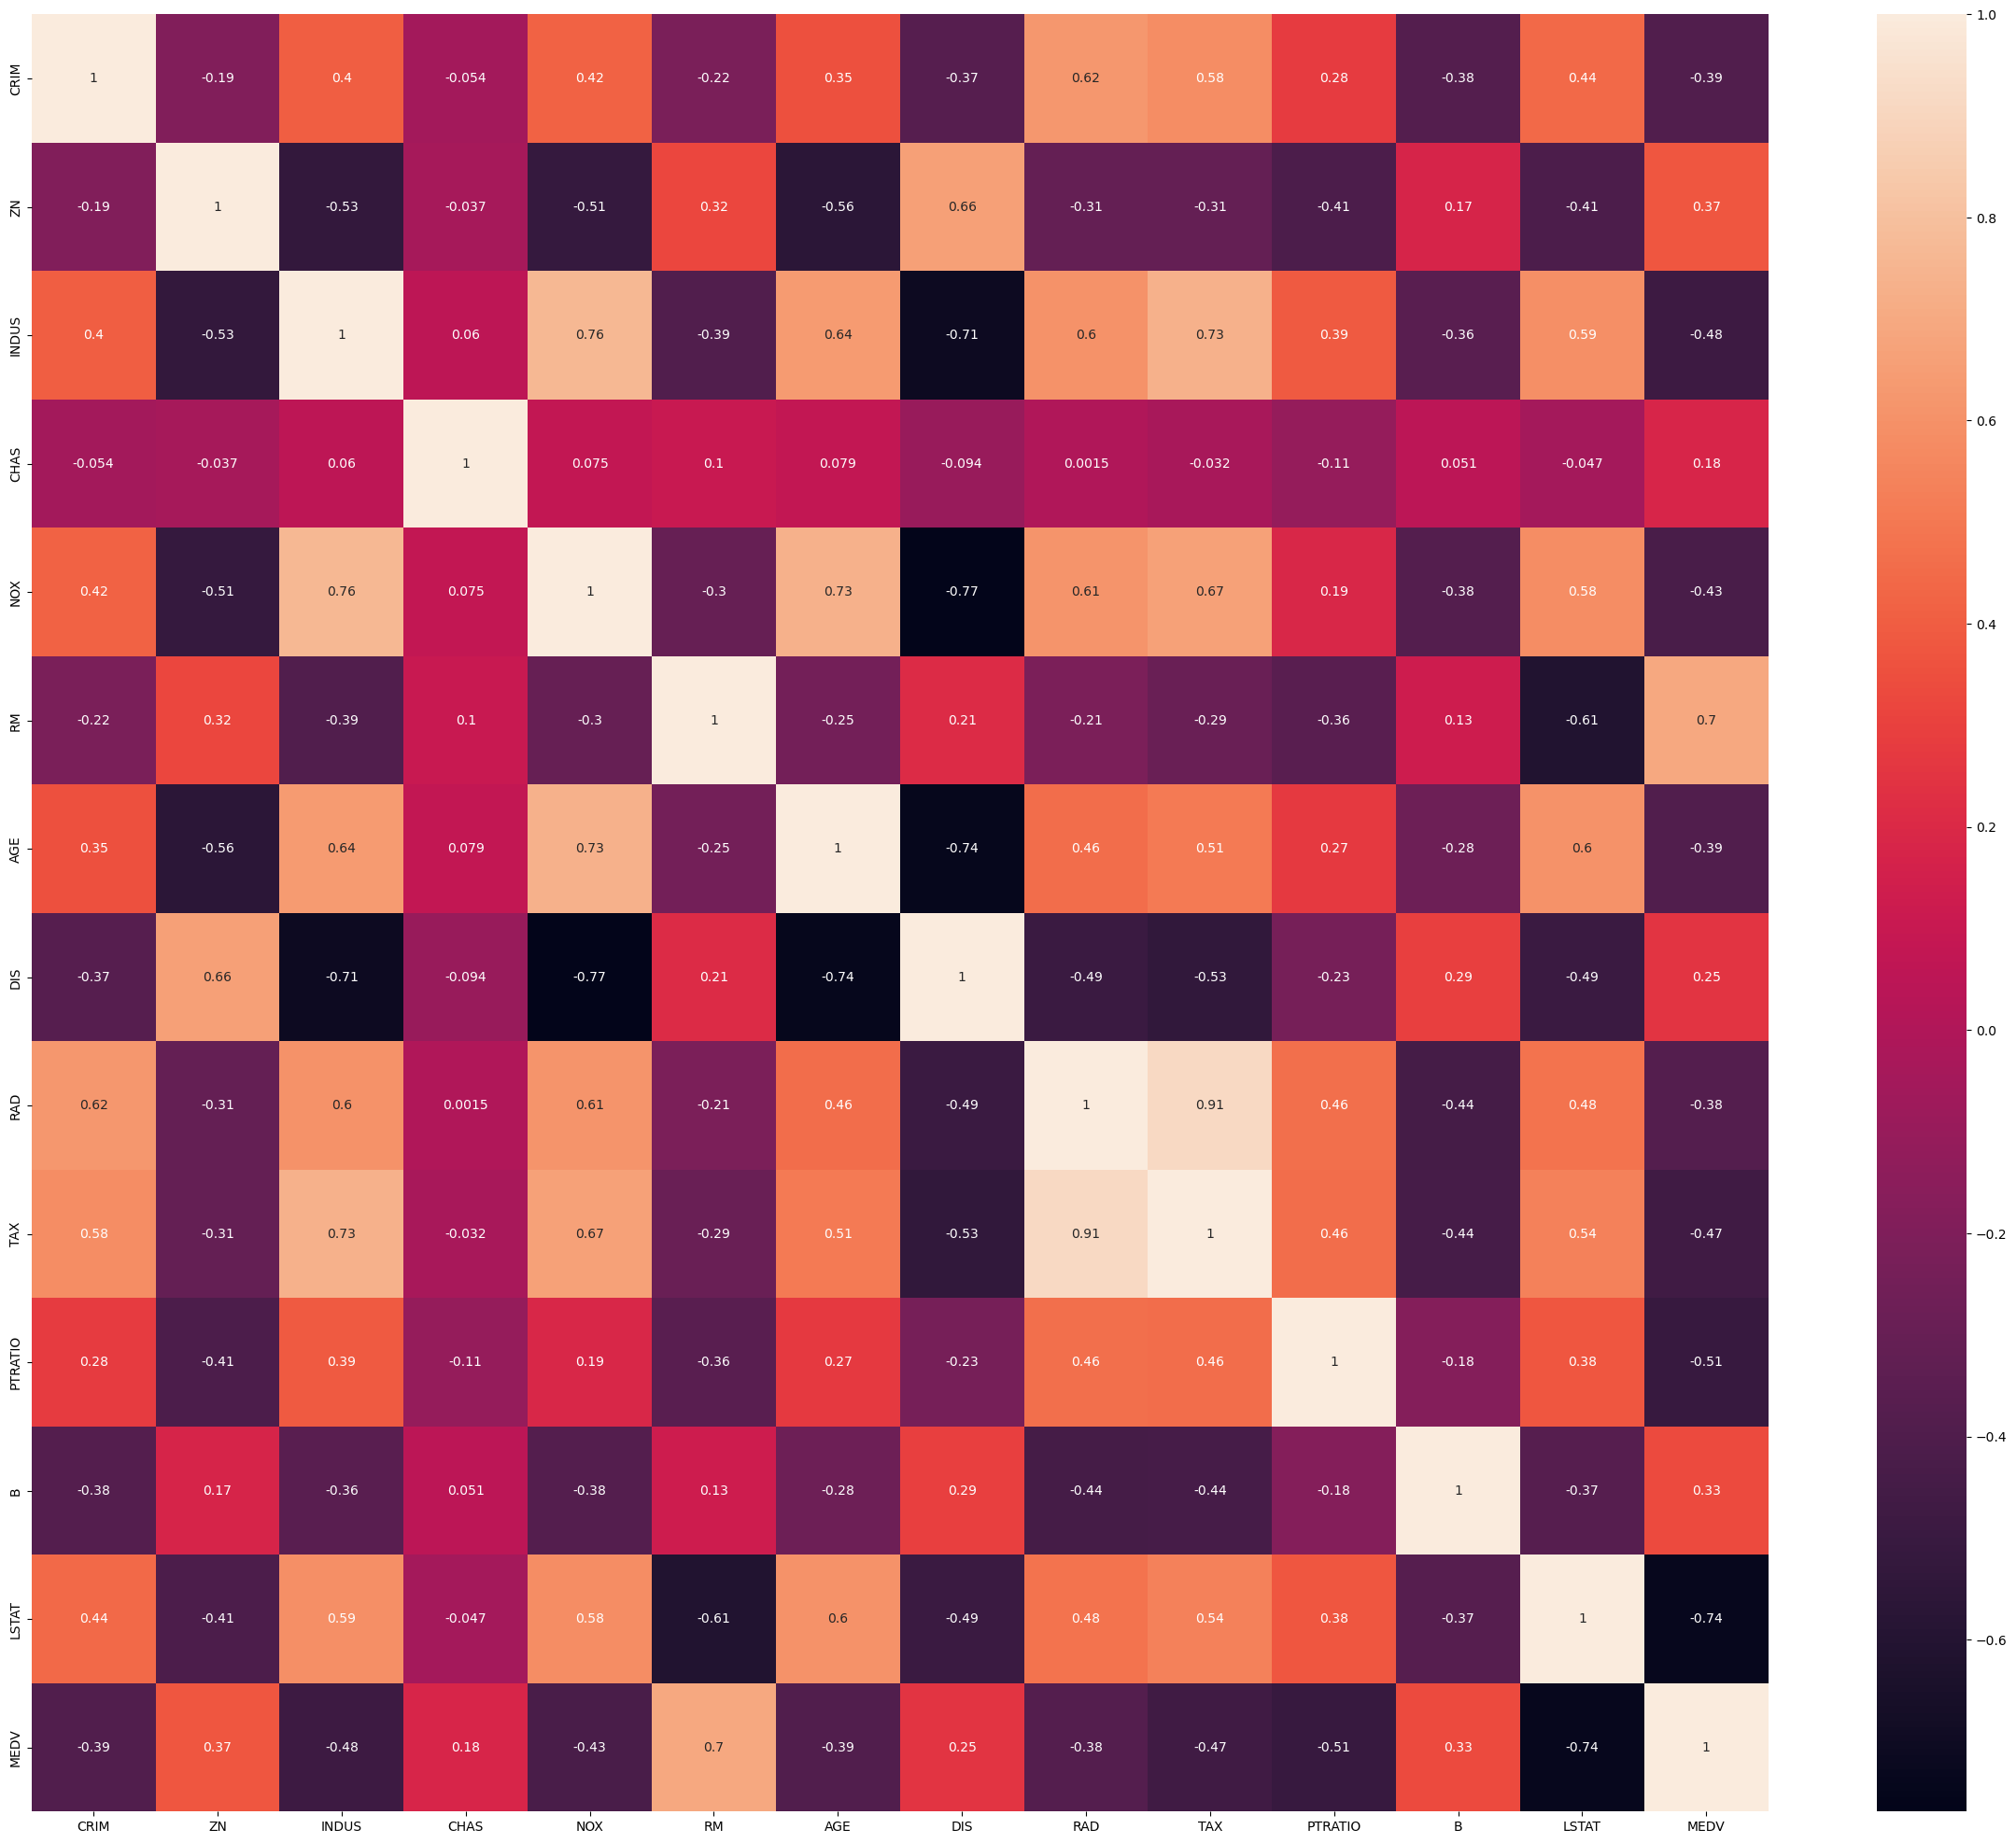

In [33]:
plt.figure(figsize=(30,25))
sns.heatmap(cor,annot=True)

In [34]:
data.dropna(inplace=True, axis= 0)

In [35]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [36]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

<Axes: ylabel='CRIM'>

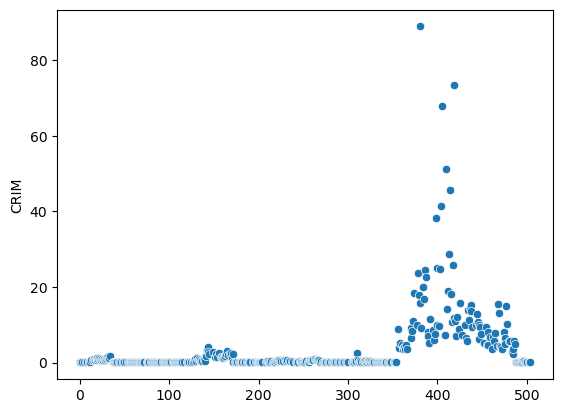

In [39]:
sns.scatterplot(data.CRIM)

<Axes: xlabel='CRIM', ylabel='Count'>

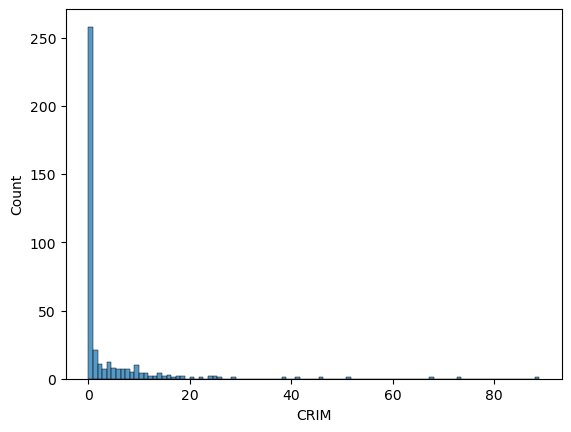

In [40]:
sns.histplot(data.CRIM)

<Axes: xlabel='CRIM', ylabel='MEDV'>

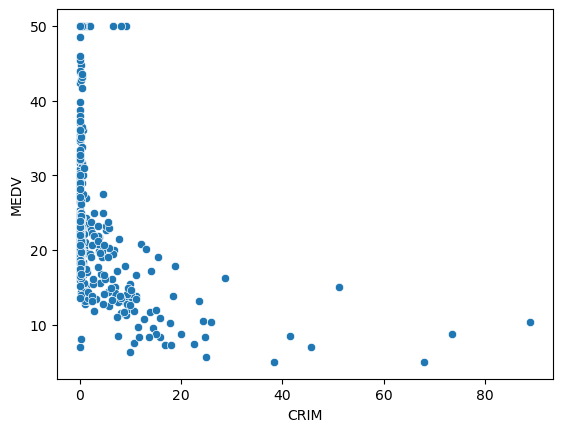

In [42]:
sns.scatterplot(data=data,x='CRIM',y='MEDV')

In [43]:
## As crime increases price decrease

<Axes: xlabel='RM', ylabel='MEDV'>

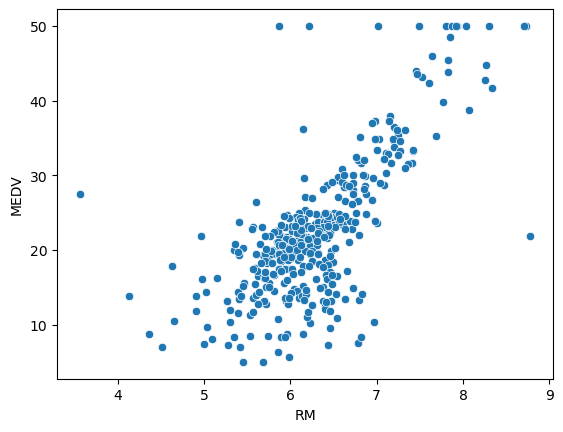

In [44]:
sns.scatterplot(data=data,x='RM',y='MEDV')

In [45]:
# As room increases price increases

<Axes: xlabel='RM', ylabel='MEDV'>

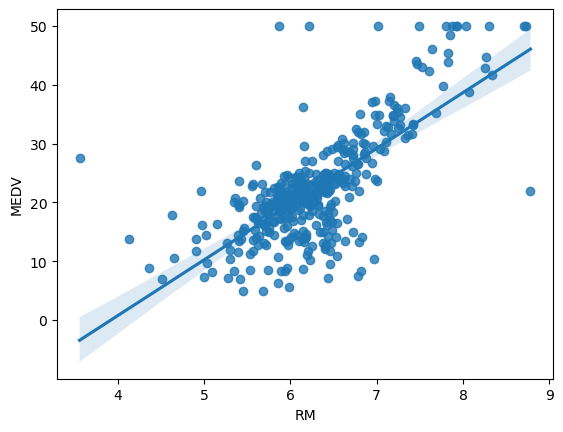

In [46]:
sns.regplot(data=data,x='RM',y='MEDV')

<Axes: xlabel='LSTAT', ylabel='MEDV'>

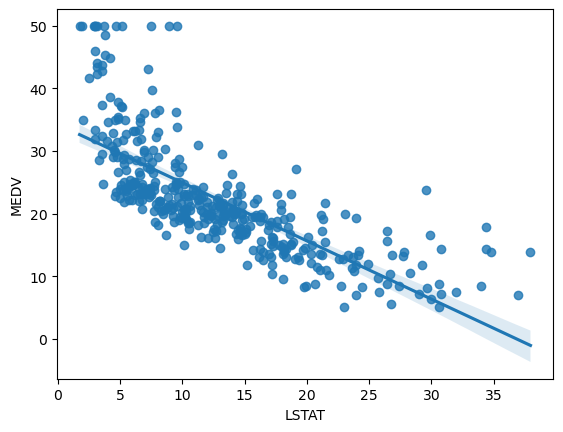

In [47]:
sns.regplot(data=data,x='LSTAT',y='MEDV')

In [48]:
# negatively correlated

In [53]:
# Data split
X=data.iloc[:,:-1]
y= data.iloc[:,-1]

In [54]:
y

0      24.0
1      21.6
2      34.7
3      33.4
5      28.7
       ... 
499    17.5
500    16.8
502    20.6
503    23.9
504    22.0
Name: MEDV, Length: 394, dtype: float64

In [55]:
#train-test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=10)

In [56]:
#standardize
from sklearn.preprocessing import StandardScaler
stand= StandardScaler()
x_train=stand.fit_transform(x_train)
x_test= stand.transform(x_test)

In [57]:
# modeling

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [60]:
predict= regression.predict(x_test)

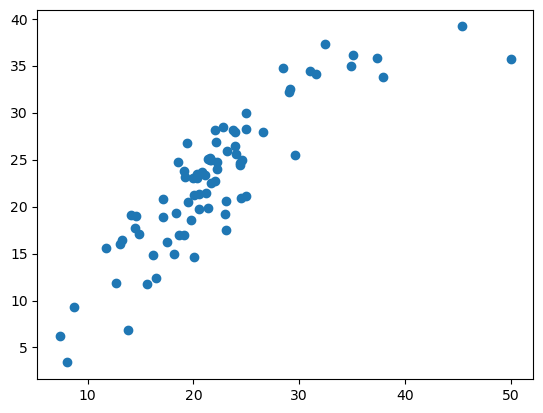

In [63]:
##scater plot
plt.scatter(y_test,predict)

In [64]:
#linear so doing some good prediction

/var/folders/7b/pb4y2ycs0s5fhd1y7ddbk2500000gn/T/ipykernel_54148/1358519789.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res,kde=True)


<Axes: xlabel='MEDV', ylabel='Density'>

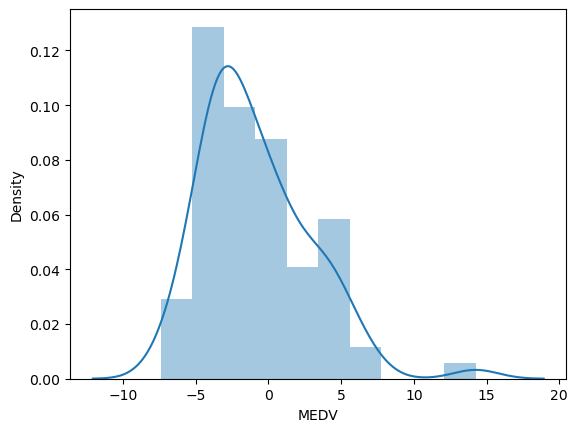

In [66]:
#residual
res = y_test-predict
sns.distplot(res,kde=True)

In [67]:
# normal distibution-- good prediction

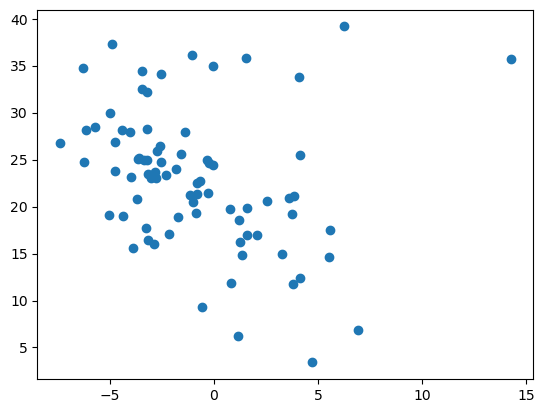

In [68]:
plt.scatter(res,predict)

In [69]:
#not following any pattern, uniformly distributed

In [70]:
#metrics

In [72]:
from sklearn.metrics import r2_score,mean_squared_error
print(mean_squared_error(y_test,predict))
print(r2_score(y_test,predict))
print(np.sqrt(mean_squared_error(y_test,predict)))

14.55036685259309
0.7291192461876843
3.814494311516677


In [73]:
#adjusted r2 score
r2=r2_score(y_test,predict)
adj_r2 = 1-((1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[-1]-1))


In [74]:
adj_r2

0.6749430954252211

## 

In [75]:
## pickling the model file for deployment

In [76]:
import pickle

In [77]:
pickle.dump(regression,open('regmodel.pkl','wb'))